## Projeto de Análise de Dados e Automação

### Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import plotly.express as px
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
from cycler import cycler
from datetime import datetime, timedelta

yf.pdr_override()

### Analisando o Índice IBOVESPA

- O índice IBOVESPA é o mais importante indicador do desempenho médio das cotações negociadas na bolsa de valores B3.<br>
- Ele é formado pelos ativos (ações) com maior volume negociado nos últimos meses.

### Período

In [2]:
dias = int(input('Digite o período em número de dias. '))

Digite o período em número de dias. 730


In [3]:
data_inicial = datetime.now() - timedelta(days=dias)
data_final = datetime.now()

### Requisitando os Dados dos Ativos

In [4]:
# requisiçao
df_ibov = pdr.get_data_yahoo('^BVSP', data_inicial, data_final)['Adj Close']
df_ibov

[*********************100%%**********************]  1 of 1 completed


Date
2021-10-29    103501.0
2021-11-01    105551.0
2021-11-03    105617.0
2021-11-04    103412.0
2021-11-05    104824.0
                ...   
2023-10-23    112785.0
2023-10-24    113762.0
2023-10-25    112830.0
2023-10-26    114777.0
2023-10-27    113301.0
Name: Adj Close, Length: 499, dtype: float64

### Calculando o Retorno

In [5]:
# localizando o último e o primeiro preço
retorno = df_ibov.iloc[-1] / df_ibov.iloc[0] - 1
print('O retorno foi de: {:.2%}'.format(retorno))

O retorno foi de: 9.47%


### Média Móvel

- **Média Móvel** é um dos indicadores que são observados pelos analistas e investidores que atuam no mercado financeiro, serve para verificar tendências dentro de uma análise gráfica.

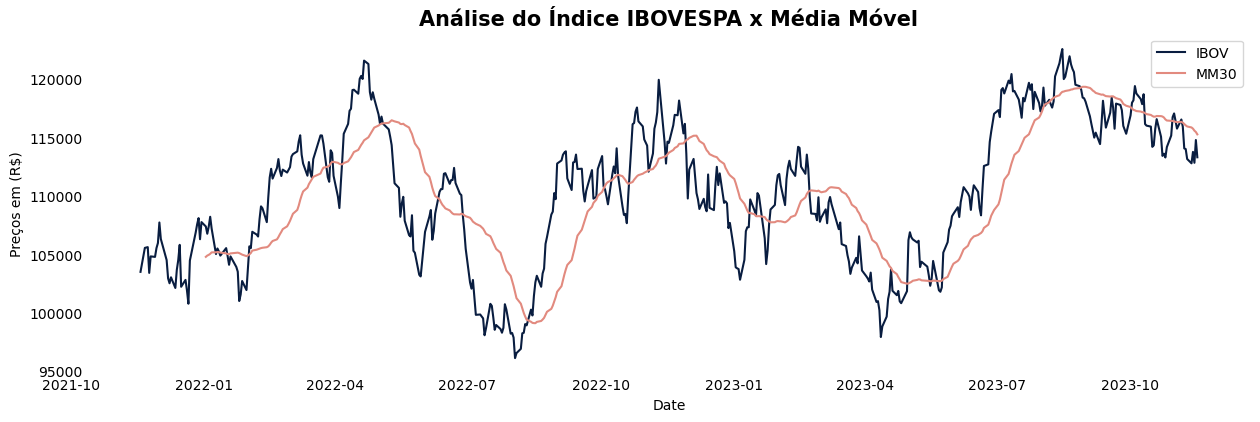

In [6]:
# Gráfico
df_ibov.plot(label='IBOV', figsize=(15, 5), color='#091D40')

# Verificando a janela do tempo
media_movel = df_ibov.rolling(30).mean()

# Gráfico
media_movel.plot(label='MM30', color='#E28A7F')

# Exibindo a legenda
plt.legend()

# Exibindo o gráfico
plt.box(False)
plt.xticks(rotation=0)
plt.tick_params(axis='x', length=0)
plt.tick_params(axis='y', length=0)
plt.title('Análise do Índice IBOVESPA x Média Móvel', fontsize=15, fontweight='bold')
plt.ylabel('Preços em (R$)')
plt.show()

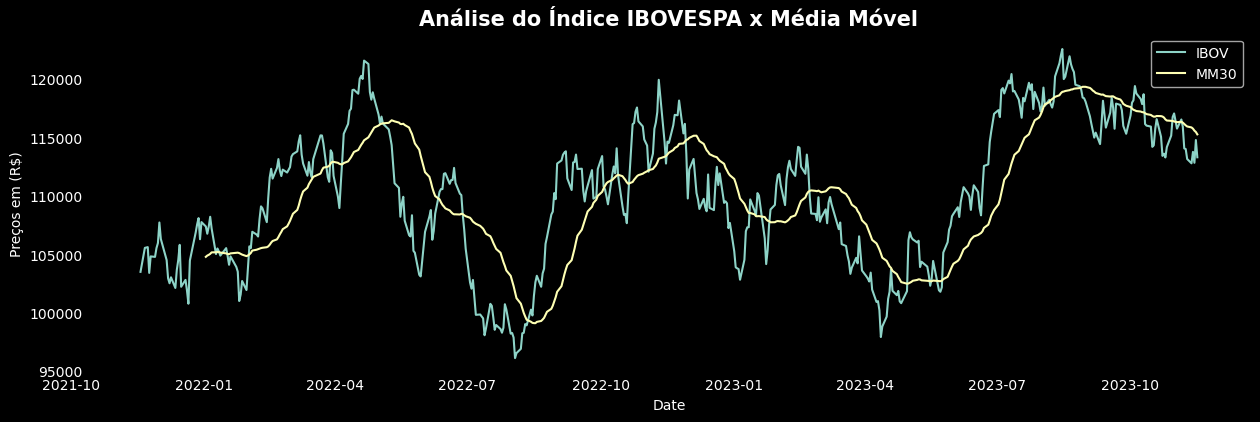

In [7]:
# Estilo
plt.style.use('dark_background')

# Gráfico
df_ibov.plot(label='IBOV', figsize=(15, 5))

# Verificando a janela do tempo
media_movel = df_ibov.rolling(30).mean()

# Gráfico
media_movel.plot(label='MM30')

# Exibindo a legenda
plt.legend()

# Exibindo o gráfico
plt.box(False)
plt.xticks(rotation=0)
plt.tick_params(axis='x', length=0)
plt.tick_params(axis='y', length=0)
plt.title('Análise do Índice IBOVESPA x Média Móvel', fontsize=15, fontweight='bold')
plt.ylabel('Preços em (R$)')
plt.show()

In [8]:
# Cotação Máxima
cotacao_maxima = np.amax(df_ibov)
print(f'A cotação máxima do índice IBOVESPA no período foi de: {cotacao_maxima:,.0f}')

A cotação máxima do índice IBOVESPA no período foi de: 122,560


In [9]:
# Cotação Mínima
cotacao_minima = np.amin(df_ibov)
print(f'A cotação mínima do índice IBOVESPA no período foi de: {cotacao_minima:,.0f}')

A cotação mínima do índice IBOVESPA no período foi de: 96,121


In [10]:
cotacao_atual = df_ibov.iloc[-1]
print(f'A cotação atual do índice IBOVESPA é de: {cotacao_atual:,.0f}')

A cotação atual do índice IBOVESPA é de: 113,301


### Carregando os Dados da Carteira

In [11]:
df_carteira = pd.read_excel('carteira.xlsx')
df_carteira

,Ticker,Empresa,Setor,Cotas
0,AGRO3,Brasilagro,Agropecuária,100
1,B3SA3,B3,Serviços Financeiros,100
2,EGIE3,Engie Brasill,Energia Elétrica,50
3,LEVE3,Metal Leve,Automóveis e Motocicletas,75
4,PRIO3,Petrorio,Petróleo e Gás,100
5,PSSA3,Porto Seguro,Previdência e Seguros,50
6,ODPV3,Odontoprev,Seviços Médicos,100
7,SUZB3,Suzano S.A,Madeira e Papel,100
8,WEGE3,WEG,Máquinas e Equipamentos,50


In [12]:
data_inical = datetime.now() - timedelta(days=dias)
data_final = datetime.now()

# transformando a coluna Ticker em uma lista python
lista_ativos = list(df_carteira['Ticker'].astype(str) + '.SA')

# requisição
df_cotacoes = pdr.get_data_yahoo(lista_ativos, data_inical, data_final)['Adj Close']
df_cotacoes = round(df_cotacoes, 2)
df_cotacoes

[*********************100%%**********************]  9 of 9 completed


,AGRO3.SA,B3SA3.SA,EGIE3.SA,LEVE3.SA,ODPV3.SA,PRIO3.SA,PSSA3.SA,SUZB3.SA,WEGE3.SA
Date,,,,,,,,,
2021-10-29,19.12,10.90,33.84,27.04,12.68,23.47,20.19,46.25,35.81
2021-11-01,19.20,10.97,34.02,27.77,12.35,23.40,20.48,45.95,35.77
2021-11-03,19.71,10.98,34.72,28.18,13.16,23.80,20.81,46.76,36.47
2021-11-04,19.21,10.93,34.61,26.41,13.03,23.39,20.66,46.32,36.51
2021-11-05,20.16,11.32,34.35,26.20,13.33,27.57,21.11,46.36,36.47
...,...,...,...,...,...,...,...,...,...
2023-10-23,26.53,11.31,40.81,38.00,11.04,48.84,25.30,54.40,33.90
2023-10-24,26.97,11.60,40.55,40.80,11.21,48.85,25.52,52.51,35.01
2023-10-25,24.54,11.54,40.23,40.46,10.59,48.36,25.97,52.60,31.47


### Tratamento de Dados

In [13]:
# trazendo informações do dataframe
df_cotacoes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 499 entries, 2021-10-29 to 2023-10-27
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AGRO3.SA  499 non-null    float64
 1   B3SA3.SA  499 non-null    float64
 2   EGIE3.SA  499 non-null    float64
 3   LEVE3.SA  499 non-null    float64
 4   ODPV3.SA  499 non-null    float64
 5   PRIO3.SA  499 non-null    float64
 6   PSSA3.SA  499 non-null    float64
 7   SUZB3.SA  499 non-null    float64
 8   WEGE3.SA  499 non-null    float64
dtypes: float64(9)
memory usage: 39.0 KB


- Os dados dentro do dataframe que aparecerem em branco serão tratados e preenchidos com os dados do dia anterior, porque para o caso especifico de preços de ações não seria coerente aplicar estatísticas como (moda ou média) dos valores analisados no perídodo.

In [14]:
# preencehdo valores vázios
df_cotacoes = df_cotacoes.ffill()

In [15]:
df_cotacoes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 499 entries, 2021-10-29 to 2023-10-27
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AGRO3.SA  499 non-null    float64
 1   B3SA3.SA  499 non-null    float64
 2   EGIE3.SA  499 non-null    float64
 3   LEVE3.SA  499 non-null    float64
 4   ODPV3.SA  499 non-null    float64
 5   PRIO3.SA  499 non-null    float64
 6   PSSA3.SA  499 non-null    float64
 7   SUZB3.SA  499 non-null    float64
 8   WEGE3.SA  499 non-null    float64
dtypes: float64(9)
memory usage: 39.0 KB


### Normalizando os Dados

- Colocando os dados para incializarem a partir do mesmo valor (1) e estarão todos na mesma base, e se verificará que determinados ativos ou terão subido ou terão caido.<br>
- Pegando o último valor de uma coluna e dividindo pelo primeiro valor da mesma coluna, os outros valores do range da coluna será a comparação entre eles e o valor inicial.

In [16]:
# Criando um dataframe com os dados normalizados
df_cotacoesNorm = df_cotacoes / df_cotacoes.iloc[0]

### Plotando Gráfico

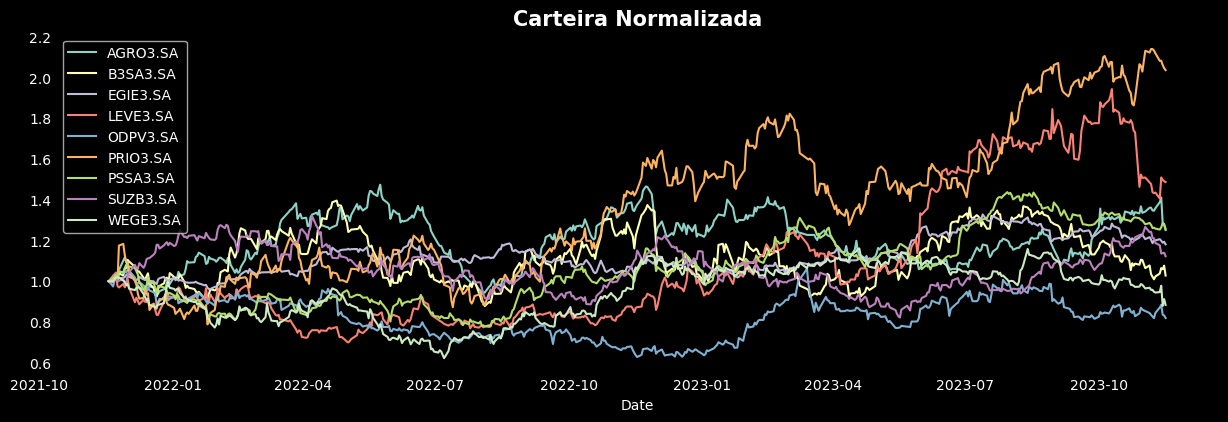

In [17]:
# Estilo
plt.style.use('dark_background')

df_cotacoesNorm.plot(figsize=(15, 5))
plt.legend(loc='upper left')
plt.xticks(rotation=0)
plt.tick_params(axis='x', length=0)
plt.tick_params(axis='y', length=0)
plt.title('Carteira Normalizada', fontsize=15, fontweight='bold')
plt.box(False)
plt.show()

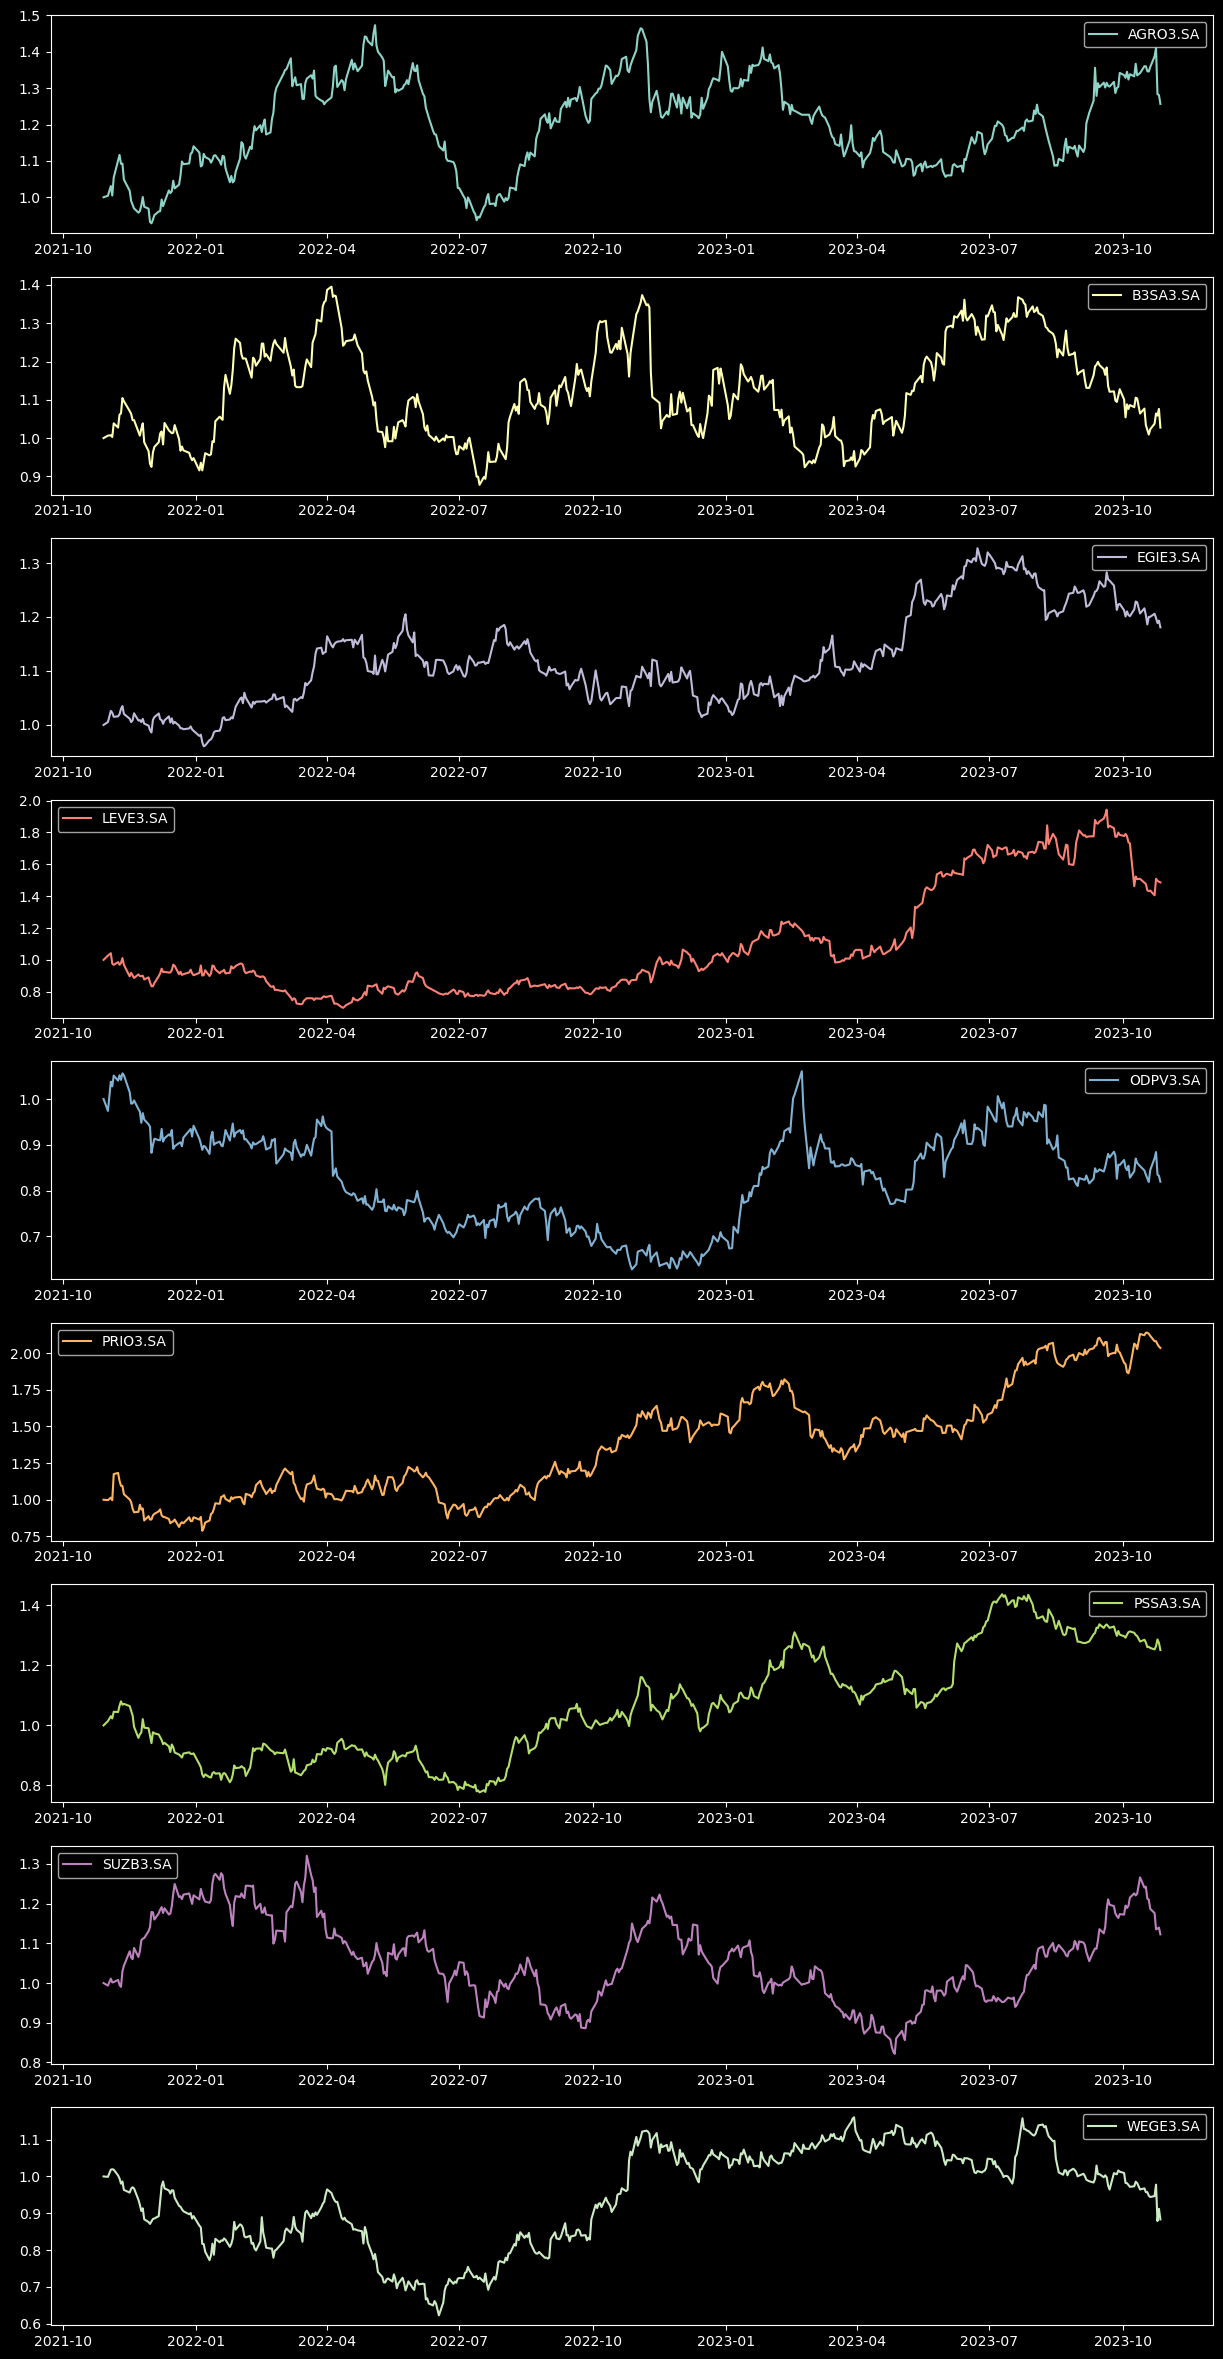

In [18]:
# Estilo
plt.style.use('dark_background')

fig, axs = plt.subplots(nrows=9, ncols=1, figsize=(15,30))

ativos = ['AGRO3.SA', 'B3SA3.SA', 'EGIE3.SA', 'LEVE3.SA', 'ODPV3.SA', 'PRIO3.SA', 'PSSA3.SA', 'SUZB3.SA', 'WEGE3.SA']

for i, ativo in enumerate(ativos):
    axs[i].plot(df_cotacoesNorm.index, df_cotacoesNorm[ativo], label=ativo, color=f'C{i}')
    axs[i].legend()
    
plt.show()

### Calculando o Retorno da Carteira

**observação:** Para calcular o retorno da carteira não pode ser todo consolidado, porque precisamo calcular o retorno de cada ativo devido as cotações dos preços serem distintas.<br>
- Pega o valor de cotação de cada ativo e multiplica pela quantidade de cotas de cada um dos ativos.

### Criando um Novo Dataframe de Valores Investidos

In [19]:
# criando um dataframe vázio
df_valorInvestido = pd.DataFrame()

# percorrendo cada ativo do dataframe
for ativo in df_carteira['Ticker']:
    cotas = df_carteira.loc[df_carteira['Ticker'] == ativo, 'Cotas'].values[0]
    # criando uma nova coluna com os valores de cada ativo
    df_valorInvestido[ativo] = cotas * df_cotacoes[f'{ativo}.SA']
    
# criando uma nova coluna com o valor total
df_valorInvestido['Total'] = df_valorInvestido.sum(axis=1)   # somando todos os valores das colunas

df_valorInvestido = round(df_valorInvestido, 2)
df_valorInvestido

,AGRO3,B3SA3,EGIE3,LEVE3,PRIO3,PSSA3,ODPV3,SUZB3,WEGE3,Total
Date,,,,,,,,,,
2021-10-29,1912.0,1090.0,1692.0,2028.00,2347.0,1009.5,1268.0,4625.0,1790.5,17762.00
2021-11-01,1920.0,1097.0,1701.0,2082.75,2340.0,1024.0,1235.0,4595.0,1788.5,17783.25
2021-11-03,1971.0,1098.0,1736.0,2113.50,2380.0,1040.5,1316.0,4676.0,1823.5,18154.50
2021-11-04,1921.0,1093.0,1730.5,1980.75,2339.0,1033.0,1303.0,4632.0,1825.5,17857.75
2021-11-05,2016.0,1132.0,1717.5,1965.00,2757.0,1055.5,1333.0,4636.0,1823.5,18435.50
...,...,...,...,...,...,...,...,...,...,...
2023-10-23,2653.0,1131.0,2040.5,2850.00,4884.0,1265.0,1104.0,5440.0,1695.0,23062.50
2023-10-24,2697.0,1160.0,2027.5,3060.00,4885.0,1276.0,1121.0,5251.0,1750.5,23228.00
2023-10-25,2454.0,1154.0,2011.5,3034.50,4836.0,1298.5,1059.0,5260.0,1573.5,22681.00


### Comparando o Retorno da Carteira com o Índice do IBOVESPA

#### Normalizando os dados da Carteira e os dados do IBOVESPA

- Colocando os dados para incializarem a partir do mesmo valor (1) e estarão todos na mesma base, e se verificará que determinados ativos ou terão subido ou terão caido.<br>
- Pegando o último valor de uma coluna e dividindo pelo primeiro valor da mesma coluna, os outros valores do range da coluna será a comparação entre eles e o valor inicial.

In [20]:
# criando as duas tabelas normalizadas
df_ibovNorm = df_ibov / df_ibov.iloc[0]

In [21]:
# carteira normalizado
df_valorInvestidonorm = df_valorInvestido / df_valorInvestido.iloc[0]

In [22]:
df_ibovNorm.head()

Date
2021-10-29    1.000000
2021-11-01    1.019807
2021-11-03    1.020444
2021-11-04    0.999140
2021-11-05    1.012782
Name: Adj Close, dtype: float64

### Plotando um Gráfico do Histórico

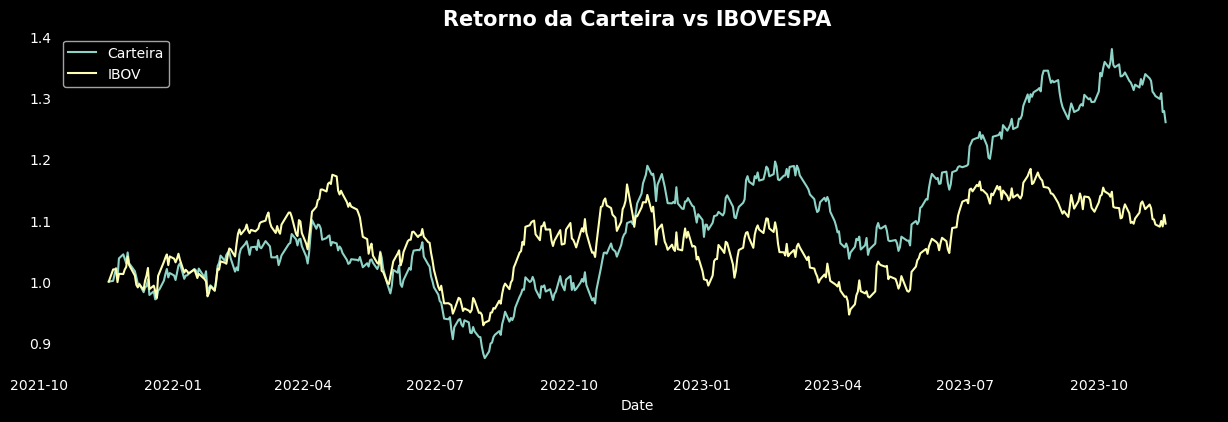

In [23]:
# Estilo
plt.style.use('dark_background')

df_valorInvestidonorm['Total'].plot(figsize=(15, 5), label='Carteira')
df_ibovNorm.plot(label='IBOV')

plt.legend()
plt.xticks(rotation=0)
plt.tick_params(axis='x', length=0)
plt.tick_params(axis='y', length=0)
plt.title('Retorno da Carteira vs IBOVESPA', fontsize=15, fontweight='bold')
plt.box(False)

plt.show()

### Calculando o Retorno e a Correlação

In [24]:
# retorno IBOVESPA
retorno_ibov = df_ibovNorm[-1] -1 # o cálculo aqui foi feito direto porque a dataframe já está normalizado

# retorno da Carteira
retorno_carteira = df_valorInvestidonorm['Total'][-1] -1 

# imprimindo o retorno
print(f'O retorno do IBOV foi de: {retorno_ibov:.2%}')
print(f'O retorno da Carteira de Investimentos foi de: {retorno_carteira:.2%}')

O retorno do IBOV foi de: 9.47%
O retorno da Carteira de Investimentos foi de: 26.04%


In [25]:
# correlação
correlacao = df_valorInvestido['Total'].corr(df_ibov)

print(f'A correlação da Carteira de Investimentos e o IBOV foi de: {correlacao:.2%}')

A correlação da Carteira de Investimentos e o IBOV foi de: 67.76%


## Fim